# Chapter 4: Exercise 16

We develop models to predict crime rate in Boston suburbs. In particular we are predicting whether a neighborhood will have crime rate above or below the median Boston crime rate.

Boston Dataset: 506 observations on the following 13 variables.

- **crim:** per capita crime rate by town
- **zn:** proportion of residential land zoned for lots over 25,000 sq.ft.
- **indus:** proportion of non-retail business acres per town
- **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **nox:** nitrogen oxides concentration (parts per 10 million)
- **rm:** average number of rooms per dwelling
- **age:** proportion of owner-occupied units built prior to 1940
- **dis:** weighted mean of distances to five Boston employment centers
- **rad:** index of accessibility to radial highways
- **tax:** full-value property-tax rate per &dollar;10,000
- **ptratio:** pupil-teacher ratio by town
- **lstat:** lower status of the population (percent)
- **medv:** median value of owner-occupied homes in &dollar;1000s

**Import packages**

In [2]:
# import numpy as np
# import pandas as pd
from ISLP import load_data
# import statsmodels.api as sm
# from sklearn.model_selection import train_test_split
# from sklearn.discriminant_analysis import \
#     (LinearDiscriminantAnalysis as LDA,
#      QuadraticDiscriminantAnalysis as QDA)
# from ISLP import confusion_table
# from ISLP.models import ModelSpec as MS
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# import matplotlib.pyplot as plt

### Create binary variable crim01
crim01 = 1 if crim > median(crim), 0 otherwise

In [3]:
Boston = load_data('Boston')
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
crim01 = [int(b) for b in Boston['crim'] > Boston['crim'].median()]

In [5]:
Boston['crim01'] = crim01

### Explore graphically the association between crim01 and other variables

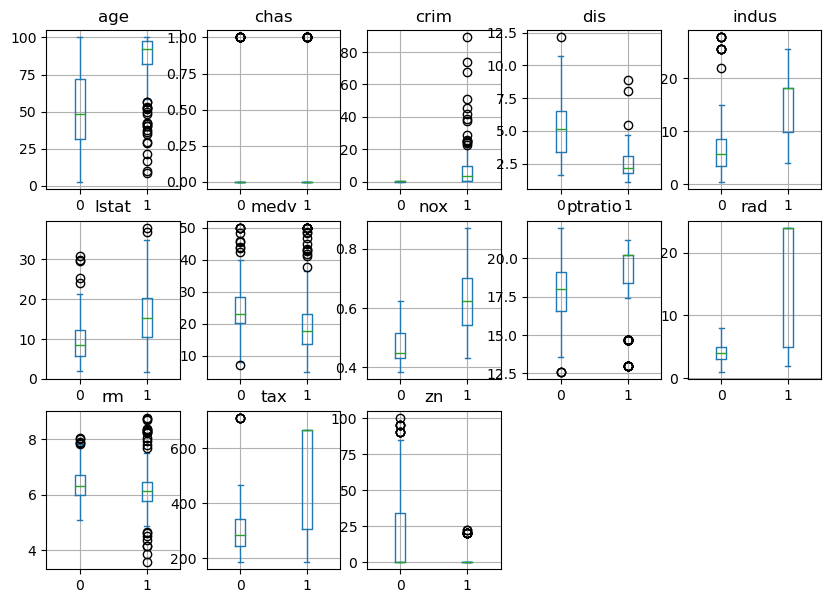

In [9]:
Boston.plot.box(by='crim01', layout=(3,5), figsize=(10,7), grid=True);

In [8]:
Boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim01
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,0.409395
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,-0.436151
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,0.603260
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.070097
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,0.723235
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,-0.156372
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,0.613940
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,-0.616342
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,0.619786
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,0.608741


The variables that seem most likely to be useful in predicting crim01 are:

- nox
- age
- indus
- dis
- rad
- tax